In [53]:
# prompt: change PlayType_description to Event

# Rename the 'PlayType_description' column to 'Event'
real_df = real_df.rename(columns={'Commentary': 'Event'})

# Print the updated DataFrame0
mega_df


,Event,Commentary
0,2,"good length, 151kph, pitching outside leg, hit..."
1,2,tossed up but way wide of off and called
2,2,"spins down the leg side, signaled a wide."
3,2,low full toss at leg stump. Looks for the flic...
4,2,"length but down the leg side, starts with a wide"
...,...,...
79995,3,"back of a length, takes the thigh pad"
79996,3,"fullish and straight, seaming back in, defende..."
79997,3,shortens his length after he sees Smith coming...
79998,3,"beats the forward prod to hit the pad, sharp t..."


In [ ]:
pip install tensorflow

In [ ]:
pip install matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [10]:
real_df = pd.read_csv('base_train.csv')

In [11]:
real_df.head()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
real_df.describe()

,Event,taken,pulls,length,call,quick,bowled,blocked,driven,alone,...,mid-off,full,fired,around,though,hits,worked,point,hard,review
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.750000,0.023537,0.011825,0.260675,0.042500,0.029337,0.018288,0.005812,0.018200,0.019412,...,0.022638,0.18925,0.009687,0.041662,0.020012,0.025850,0.010138,0.065275,0.021812,0.024362
std,1.479029,0.151604,0.108099,0.439006,0.201728,0.168752,0.133990,0.076018,0.133675,0.137971,...,0.148746,0.39171,0.097948,0.199818,0.140044,0.158689,0.100174,0.247012,0.146072,0.154173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# Separate samples by event
event_dfs = [real_df[real_df['Event'] == event] for event in real_df['Event'].unique()]

# Downsample or upsample to 5000 samples per event
resampled_dfs = [resample(event_df, replace=(len(event_df) < 5000), n_samples=5000, random_state=50) 
                 for event_df in event_dfs]

# Concatenate resampled dataframes
balanced_df = pd.concat(resampled_dfs)

# Split into features and target
y = balanced_df['Event']
X = balanced_df.drop('Event', axis=1)

In [14]:
from sklearn.decomposition import PCA
import numpy as np

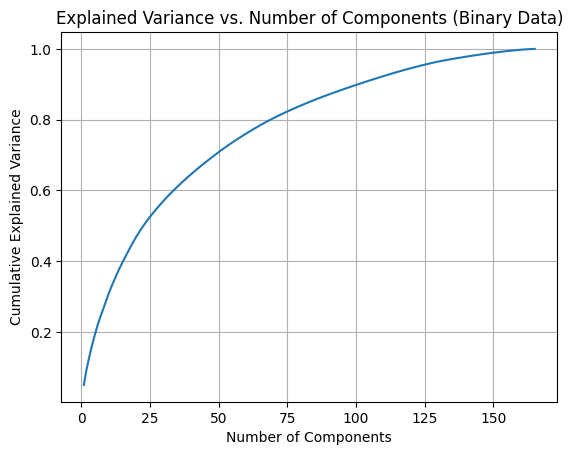

Optimal number of components: 69


In [15]:
# Assuming 'new_df' is your DataFrame and 'filtered_unique_words' is a list of binary columns

# Apply PCA without scaling
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance vs. number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (Binary Data)')
plt.grid()
plt.show()

# Choose the number of components based on desired explained variance threshold
desired_variance = 0.80  # Set your desired threshold (e.g., 95%)
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= desired_variance) + 1

print(f"Optimal number of components: {n_components}")

In [39]:
# prompt: get top 70 important column names using pca




# Apply PCA
pca = PCA(n_components=68)  # Choose the number of components (70 in this case)
pca.fit(X)

# Get the feature importances (loadings)
feature_importances = np.abs(pca.components_)

# Calculate the average importance across all components for each feature
avg_feature_importances = np.mean(feature_importances, axis=0)

# Get the indices of the top 70 most important features
top_feature_indices = np.argsort(avg_feature_importances)[::-1][:68]

# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_indices]

print("Top 68 important column names:")
print(top_feature_names)


Top 68 important column names:
['deep', 'fine', 'pull', 'edge', 'goes', 'line', 'square', 'top', 'point', 'good', 'across', 'outside', 'looks', 'towards', "'s", 'pitch', 'left', 'flick', 'cut', 'forward', 'stumps', 'hit', 'drive', 'stump', 'full', 'short', 'turn', 'bat', 'side', 'sweep', 'high', 'right', 'leg', 'time', 'length', 'bounce', 'keeper', 'middle', 'one', 'catch', 'cover', 'pad', 'well', 'man', 'take', 'delivery', 'back', 'shot', 'straight', 'ca', 'misses', 'around', 'long', 'call', 'wicket', 'inside', 'ends', 'toss', 'end', 'air', 'go', 'kph', 'foot', 'front', 'past', 'behind', 'defend', 'low']


In [16]:
top_feature_names

NameError: name 'top_feature_names' is not defined

In [17]:
# Get the names of the top 70 most important features
top_feature_names = [X.columns[i] for i in top_feature_names]

print("Top 68 important column names:")
print(top_feature_names)


NameError: name 'top_feature_names' is not defined

In [9]:
# prompt: now only keep the columns in top_feature_names and drop rest in new_df

# Keep only the columns in top_feature_names and drop the rest
real_df = balanced_df[['Event'] + top_feature_names]

# Print the updated DataFrame
real_df


NameError: name 'top_feature_names' is not defined

In [18]:
print(real_df.columns)

Index(['Event', 'taken', 'pulls', 'length', 'call', 'quick', 'bowled',
       'blocked', 'driven', 'alone',
       ...
       'mid-off', 'full', 'fired', 'around', 'though', 'hits', 'worked',
       'point', 'hard', 'review'],
      dtype='object', length=166)


In [19]:
y = real_df['Event']
X = real_df.drop('Event', axis=1)

In [20]:
y.unique()

array([2, 0, 1, 4])

In [21]:
y.replace(4,3,inplace=True)

In [22]:
len(y)

80000

In [57]:
from sklearn.metrics import f1_score

Epoch 1/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.2469 - loss: 1.3954 - val_accuracy: 0.2700 - val_loss: 1.3828
Epoch 2/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2912 - loss: 1.3790 - val_accuracy: 0.3300 - val_loss: 1.3745
Epoch 3/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.2927 - loss: 1.3736 - val_accuracy: 0.3800 - val_loss: 1.3535
Epoch 4/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3298 - loss: 1.3595 - val_accuracy: 0.4117 - val_loss: 1.3075
Epoch 5/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3495 - loss: 1.3076 - val_accuracy: 0.4400 - val_loss: 1.2336
Epoch 6/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.3914 - loss: 1.2721 - val_accuracy: 0.4500 - val_loss: 1.1903
Epoch 7/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.3942 - loss: 1.2564 - val_accuracy: 0.4500 - val_loss: 1.1572
Epoch 8/103
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.4166 - loss: 1

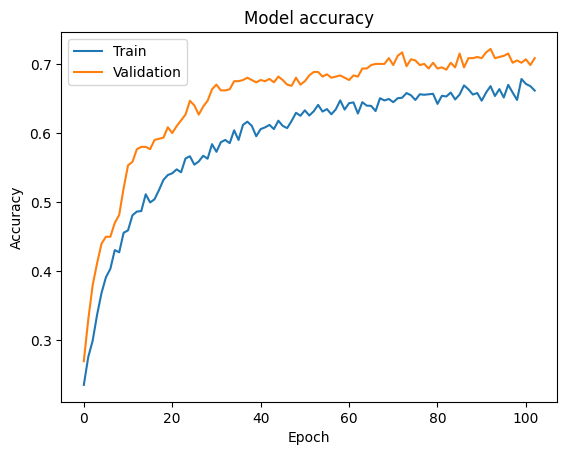

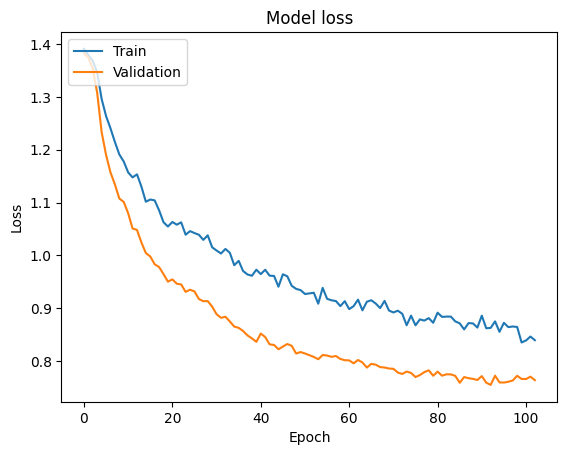

In [353]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=103, batch_size=8,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X and y are defined

# Apply PCA to reduce to 2 components
pca = PCA(n_components=70)
X_pca = pca.fit_transform(X)

# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']  # Customize colors as desired



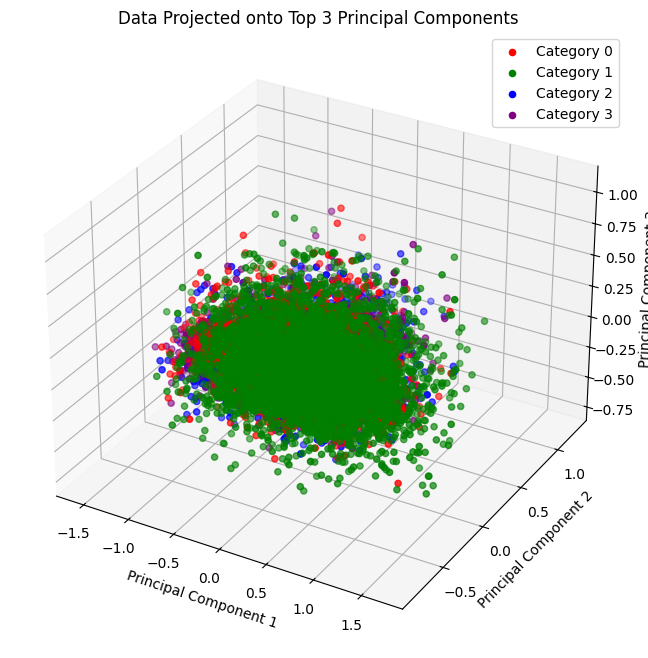

In [94]:


# Define colors for each category
colors = ['red', 'green', 'blue', 'purple']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for category in range(4):
    category_indices = y == category
    ax.scatter(X_pca[category_indices, 6], X_pca[category_indices,55], X_pca[category_indices, 69],
               c=colors[category], label=f'Category {category}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data Projected onto Top 3 Principal Components')
ax.legend()

plt.show()

Epoch 1/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.2952 - loss: 1.3740 - val_accuracy: 0.4250 - val_loss: 1.3053 - learning_rate: 0.0010
Epoch 2/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3666 - loss: 1.3109 - val_accuracy: 0.4617 - val_loss: 1.1945 - learning_rate: 0.0010
Epoch 3/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4133 - loss: 1.2674 - val_accuracy: 0.5450 - val_loss: 1.1125 - learning_rate: 0.0010
Epoch 4/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.4874 - loss: 1.1824 - val_accuracy: 0.6050 - val_loss: 1.0279 - learning_rate: 0.0010
Epoch 5/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5343 - loss: 1.1087 - val_accuracy: 0.6250 - val_loss: 0.9596 - learning_rate: 0.0010
Epoch 6/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5357 - loss: 1.0978 - val_accuracy: 0.6450 - val_loss: 0.9292 - learning_rate: 0.0010
Epoch 7/60
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5587 - loss: 1.0656 - 

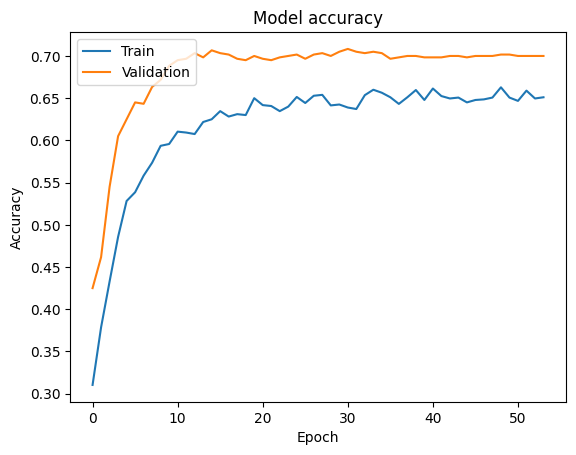

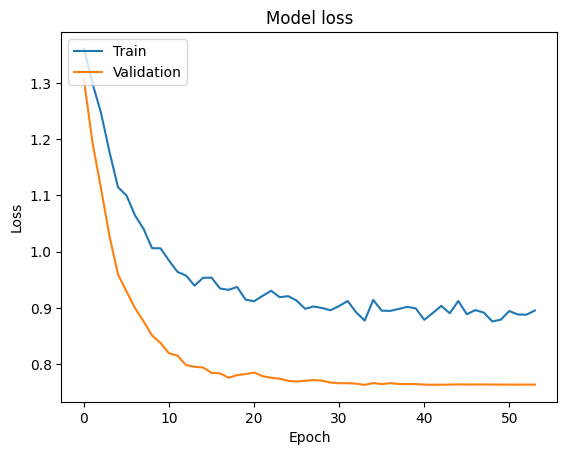

In [376]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=30,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(45, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(23, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
          layers.Dense(8, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=103, batch_size=8,
                    validation_data=(X_val, y_val),
                    #callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.2882 - loss: 1.3784 - val_accuracy: 0.4733 - val_loss: 1.2663
Epoch 2/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.4048 - loss: 1.2697 - val_accuracy: 0.5690 - val_loss: 1.0495
Epoch 3/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.4753 - loss: 1.1594 - val_accuracy: 0.5890 - val_loss: 0.9993
Epoch 4/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.5006 - loss: 1.1148 - val_accuracy: 0.6073 - val_loss: 0.9644
Epoch 5/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.5230 - loss: 1.0882 - val_accuracy: 0.6127 - val_loss: 0.9395
Epoch 6/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.5297 - loss: 1.0643 - val_accuracy: 0.6177 - val_loss: 0.9309
Epoch 7/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.5420 - loss: 1.0446 - val_accuracy: 0.6103 - val_loss: 0.9342
Epoch 8/103
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 

NameError: name 'f1_score' is not defined

Epoch 1/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 1.3333 - val_accuracy: 0.5437 - val_loss: 1.1815 - learning_rate: 0.0010
Epoch 2/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.4974 - loss: 1.1762 - val_accuracy: 0.6383 - val_loss: 1.0277 - learning_rate: 0.0010
Epoch 3/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.5670 - loss: 1.0496 - val_accuracy: 0.6603 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 4/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5927 - loss: 0.9992 - val_accuracy: 0.6740 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 5/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.6126 - loss: 0.9585 - val_accuracy: 0.6820 - val_loss: 0.8412 - learning_rate: 0.0010
Epoch 6/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6257 - loss: 0.9298 - val_accuracy: 0.6820 - val_loss: 0.8228 - learning_rate: 0.0010
Epoch 7/125
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.6425 - loss: 0.89

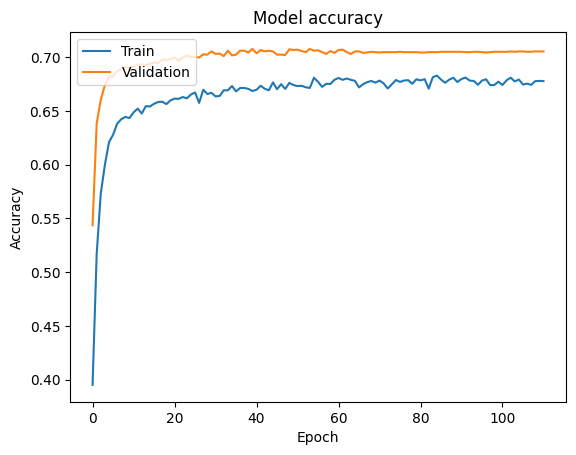

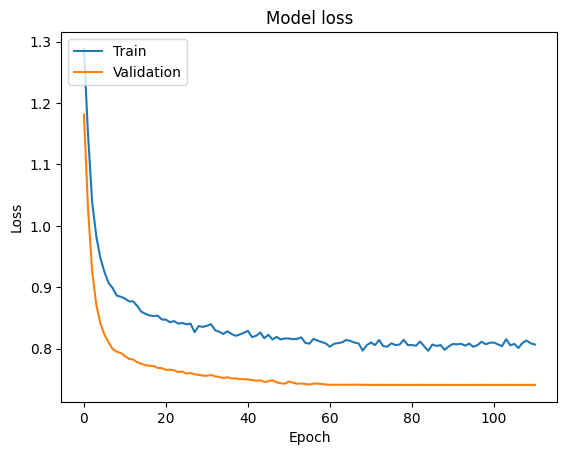

In [84]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)

# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(37, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(15, activation='relu'),
           layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=125, batch_size=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.3697 - val_accuracy: 0.5103 - val_loss: 1.2124 - learning_rate: 0.0010
Epoch 2/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.5025 - loss: 1.1781 - val_accuracy: 0.6343 - val_loss: 1.0077 - learning_rate: 0.0010
Epoch 3/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.5970 - loss: 1.0240 - val_accuracy: 0.6627 - val_loss: 0.8873 - learning_rate: 0.0010
Epoch 4/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.6317 - loss: 0.9376 - val_accuracy: 0.6723 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 5/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6339 - loss: 0.9106 - val_accuracy: 0.6760 - val_loss: 0.8190 - learning_rate: 0.0010
Epoch 6/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.6395 - loss: 0.8969 - val_accuracy: 0.6827 - val_loss: 0.8063 - learning_rate: 0.0010
Epoch 7/120
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.6564 - loss: 0.87

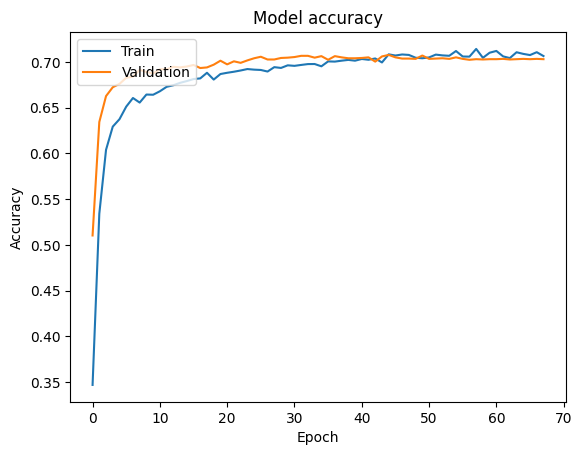

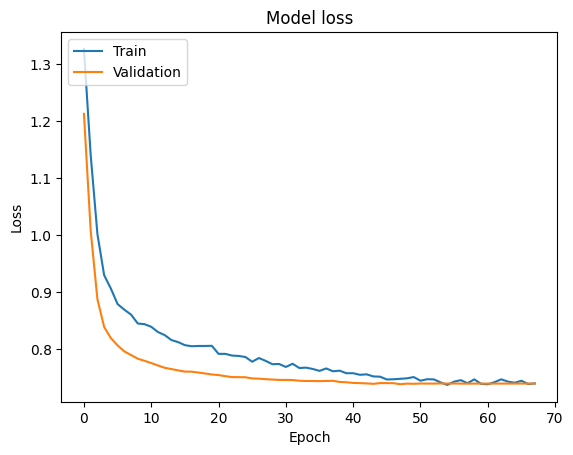

In [87]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=50)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=50)




# Define the neural network model
model = keras.Sequential([
    layers.Dropout(0.1),
    layers.Dense(59, activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(15, activation='relu'),
          layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_reduction]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [31]:
df=pd.read_csv('base_train.csv')

In [32]:
df['Event']=df['Event'].replace(4,3,inplace=True)

/var/folders/9q/ftjfwhn958sgctkd6pctp58h0000gn/T/ipykernel_1155/3006424286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Event']=df['Event'].replace(4,3,inplace=True)


In [33]:
# Extract the features (x columns) and the target (y column)
X = df.drop(columns=['Event']).values  # Assuming all columns except 'Event' are features
y = df['Event'].values  # This is the target column
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
